## Batch gradient vs stochastic vs Mini Batch

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


#### scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
scaled_X = scaler.fit_transform(df.drop('price',axis='columns'))
scaled_y = scaler.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_X

array([[-0.90830532, -0.95399809],
       [ 0.92385017,  1.16599767],
       [-0.45263971,  0.10599979],
       [-0.35652274,  0.10599979],
       [-0.73743072, -0.95399809],
       [-0.7730296 , -0.95399809],
       [ 1.08048522,  1.16599767],
       [ 1.75449061,  1.16599767],
       [-0.60690151,  0.10599979],
       [ 2.22914229,  2.22599555],
       [-0.0254532 ,  0.10599979],
       [ 1.14337657,  1.16599767],
       [-0.97475656, -0.95399809],
       [-0.85609364, -0.95399809],
       [ 0.50852995,  0.10599979],
       [-0.76709645, -0.95399809],
       [-0.7611633 ,  0.10599979],
       [-0.33397679,  0.10599979],
       [ 1.12557713,  0.10599979],
       [-1.2120824 , -2.01399597]])

In [19]:
scaled_y

array([[-0.93270651],
       [ 0.96466144],
       [-0.39512283],
       [-0.0903436 ],
       [-0.65301295],
       [-0.95779218],
       [ 1.31632978],
       [ 1.78522091],
       [-0.6764575 ],
       [ 2.06655558],
       [ 0.0737683 ],
       [ 1.43355256],
       [-0.95779218],
       [-0.91090307],
       [ 0.51921487],
       [-0.86401396],
       [-0.72334662],
       [-0.44201194],
       [ 0.54265942],
       [-1.09845952]])

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [20]:
scaled_y.reshape(20,)

array([-0.93270651,  0.96466144, -0.39512283, -0.0903436 , -0.65301295,
       -0.95779218,  1.31632978,  1.78522091, -0.6764575 ,  2.06655558,
        0.0737683 ,  1.43355256, -0.95779218, -0.91090307,  0.51921487,
       -0.86401396, -0.72334662, -0.44201194,  0.54265942, -1.09845952])

Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

<img src="hp.jpg"/>

 #### Time to implement mini batch gradient descent 
 
 Principle : can be used for small to medium samples, 
 initialize w1 , w2 , b = 1
 process flow -> find difference between ypred and yactual for all samples till end and find mean square error/log loss(cost fn) after 1st epoch
 and change the weights and base using derivatives (w1 = w1*learningrate(0.01,any) - derivative)
run the 2nd epoch perform same as above note loss value as epoch increase the loss val should decrease





In [48]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    print(X.shape[1])
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) ## 2 features -> 2 weights
    print(w)
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b
        ## print(np.dot(w, X.T)) ## Take matrixtranspose and dot product
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

2
[1. 1.]


(array([0.73213678, 0.26743589]), 7.122080702970366e-17, 0.03189534147576348)

w1 = 0.73213678
w2 = 0.26743589
bias = -0.17792104056392882

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

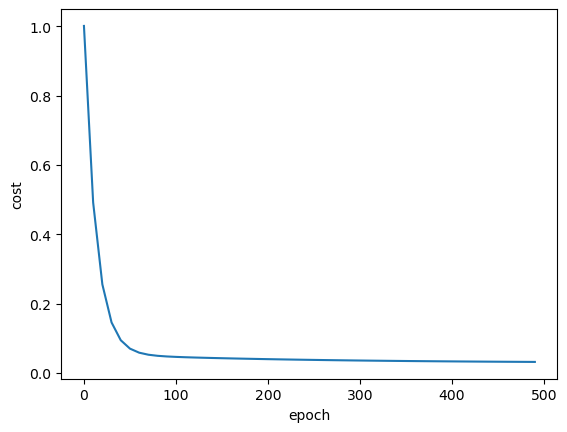

In [24]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [29]:
##some predictions now

def predict(area,bedrooms,w,b):
    scaled_area = scaler.transform([[area]])[0][0]
    scaled_bedrooms = scaler.transform([[bedrooms]])[0][0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    scaled_price = w[0] * scaled_area + w[1] * scaled_bedrooms + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    original_price = scaler.inverse_transform([[scaled_price]])[0][0]
    return original_price

predict(2600,4,w,b)

1904.6590556681588

In [30]:
predict(1000,2,w,b)

732.7053436120784

Stochastic Gradient Descent Implementation

In [32]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

5

In [41]:
import tensorflow as tf

In [42]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.72613454, 0.26135667]),
 -0.006096062356704612,
 0.00031589452346878947)

In [43]:
w , b , cost

(array([0.73213678, 0.26743589]), 7.122080702970366e-17, 0.03189534147576348)

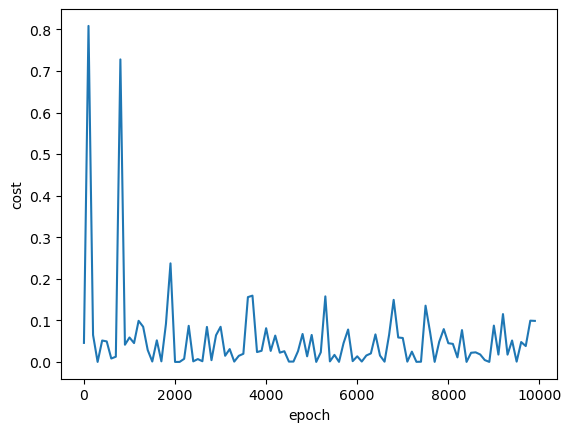

In [44]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [45]:
predict(2600,4,w_sgd, b_sgd) 

1889.7215725912488

In [46]:
predict(1500,3,w_sgd, b_sgd)

1090.7122217512535